# NBA ALL STAR CLASSIFICATION

In [2]:
from bs4 import BeautifulSoup, NavigableString
from string import ascii_lowercase
import pandas as pd
import requests
import time, os
import re
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Scrape NBA players stats from 2000
liPlayer = []

for y in range(2000, 2022):
    time.sleep(1)
    playerStats = requests.get('https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'.format(y)).text
    soup = BeautifulSoup(playerStats, 'html5lib')    
    for player in soup.findAll(class_='full_table'):
        #print(player)
        year = y
        name = player.find('td',{'data-stat':'player'}).findNext('a').text
        pos = player.find('td',{'data-stat':'pos'}).text
        age = player.find('td',{'data-stat':'age'}).text
        g = player.find('td',{'data-stat':'g'}).text
        mp = player.find('td',{'data-stat':'mp_per_g'}).text
        pts_per_g = player.find('td',{'data-stat':'pts_per_g'}).text
        trb_per_g = player.find('td',{'data-stat':'trb_per_g'}).text
        ast_per_g = player.find('td',{'data-stat':'ast_per_g'}).text
        fg_per_g = player.find('td',{'data-stat':'fg_per_g'}).text
        fg_pct = player.find('td',{'data-stat':'fg_pct'}).text
        efg_pct = player.find('td',{'data-stat':'efg_pct'}).text
        blk_per_g = player.find('td',{'data-stat':'blk_per_g'}).text
        tov_per_g = player.find('td',{'data-stat':'tov_per_g'}).text
        pf_per_g = player.find('td',{'data-stat':'pf_per_g'}).text
        
        gs = player.find('td',{'data-stat':'gs'}).text
        fg3_per_g = player.find('td',{'data-stat':'fg3_per_g'}).text
        fg2_per_g = player.find('td',{'data-stat':'fg2_per_g'}).text
        stl_per_g = player.find('td',{'data-stat':'stl_per_g'}).text
        ft_per_g = player.find('td',{'data-stat':'ft_per_g'}).text
        tm = player.find('td',{'data-stat':'team_id'}).text
        
        d = {'name':name,'year':year,'pos':pos,'age':age,'g':g,'pts_per_g':pts_per_g,'trb_per_g':trb_per_g,'ast_per_g':ast_per_g,'fg_per_g':fg_per_g,'fg_pct':fg_pct,'efg_pct':efg_pct,'blk_per_g':blk_per_g,'tov_per_g':tov_per_g,'pf_per_g':pf_per_g,'mp':mp,'gs':gs,'fg3_per_g':fg3_per_g,'fg2_per_g':fg2_per_g,'stl_per_g':stl_per_g,'ft_per_g':ft_per_g,'tm':tm}
        playerStat = pd.Series(data=d, index=['name','year','pos','age','g','pts_per_g','trb_per_g','ast_per_g','fg_per_g','fg_pct','efg_pct','blk_per_g','tov_per_g','pf_per_g','mp','gs','fg3_per_g','fg2_per_g','stl_per_g','ft_per_g','tm'])
        liPlayer.append(playerStat)
        
dfPlayerStats = pd.DataFrame(liPlayer)
dfPlayerStats.info()

In [ ]:
dfPlayerStats.to_excel("nbastats_200x.xlsx")

In [ ]:
# Scrape Team SRS from 2000
# Team Rating System
liTeam = []

for y in range(2000, 2022):
    time.sleep(1)
    playerStats = requests.get('https://www.basketball-reference.com/leagues/NBA_{}.html'.format(y)).text
    soup = BeautifulSoup(playerStats, 'html5lib')    
    for player in soup.findAll(class_='full_table'):
        #print(player)
        year = y
        team = player.find('th',{'data-stat':'team_name'}).findNext('a').text
        team_abbrv = player.find('th',{'data-stat':'team_name'}).findNext('a')['href'][7:10]
        srs = player.find('td',{'data-stat':'srs'}).text
        win_loss_pct = player.find('td',{'data-stat':'win_loss_pct'}).text
        
        d = {'team':team,'team_abbrv':team_abbrv,'year':year,'srs':srs,'win_loss_pct':win_loss_pct}
        teamStat = pd.Series(data=d, index=['team','team_abbrv','year','srs','win_loss_pct'])
        liTeam.append(teamStat)
        
dfTeamStats = pd.DataFrame(liTeam)
dfTeamStats.info()
dfTeamStats.to_excel("nbaTeamsStats_200x.xlsx")

# Data Cleaning

In [82]:
import statsmodels.api as sm

df_train = pd.read_csv("FINAL NBA All Star - train_mix.csv")
df_train.drop(columns = ['tm_abbrv','tm_year','name','pos','year','name-year','allstar_pos'], inplace=True)
df_train.info()

X_train = df_train.drop(columns = ['all_star_player','ft_per_g'])
y_train = df_train['all_star_player']

model = sm.Logit(y_train,X_train,data=df_train)
logitModel = model.fit()
logitModel.summary()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9282 entries, 0 to 9281
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              9282 non-null   int64  
 1   g                9282 non-null   int64  
 2   pts_per_g        9282 non-null   float64
 3   trb_per_g        9282 non-null   float64
 4   ast_per_g        9282 non-null   float64
 5   fg_per_g         9282 non-null   float64
 6   fg_pct           9282 non-null   float64
 7   efg_pct          9282 non-null   float64
 8   blk_per_g        9282 non-null   float64
 9   tov_per_g        9282 non-null   float64
 10  pf_per_g         9282 non-null   float64
 11  mp               9282 non-null   float64
 12  gs               9282 non-null   int64  
 13  fg3_per_g        9282 non-null   float64
 14  fg2_per_g        9282 non-null   float64
 15  stl_per_g        9282 non-null   float64
 16  ft_per_g         9282 non-null   float64
 17  all_star_playe

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        all_star_player   No. Observations:                 9282
Model:                          Logit   Df Residuals:                     9265
Method:                           MLE   Df Model:                           16
Date:                Tue, 14 Dec 2021   Pseudo R-squ.:                  0.6573
Time:                        17:53:48   Log-Likelihood:                -647.45
converged:                       True   LL-Null:                       -1889.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0677      0.012     -5.774      0.000      -0.091      -0.045
g             -0.0717      0.025     -2.877      0.004      -0.121      -0.023
pts_per_g      0.5699      0.069      8.250      0.000       0.434       0.705
trb_per_g      0.3085      0.043      7.163      0.000       0.224       0.393
ast_per_g      0.3969      0.055      7.167      0.000       0.288       0.505
fg_per_g       1.7306      1.670      1.036      0.300      -1.543       5.005
fg_pct        15.0294     10.973      1.370      0.171      -6.477      36.536
efg_pct      -26.1551     10.511     -2.488      0.013     -46.756      -5.555
blk_per_g      0.8886      0.154      5.755      0.000       0.586       1.191
tov_per_g     -0.3391      0.178     -1.904      0.057      -0.688       0.010
pf_per_g      -0.8843      0.160     -5.540      0.000      -1.197      -0.571
mp            -0.1289      0.026     -5.042      0.000      -0.179      -0.079
gs             0.1066      0.024      4.507      0.000       0.060       0.153
fg3_per_g     -1.7582      1.693     -1.039      0.299      -5.076       1.560
fg2_per_g     -2.2294      1.681     -1.326      0.185      -5.525       1.066
stl_per_g     -0.1112      0.198     -0.561      0.575      -0.500       0.277
tm_srs         0.2233      0.021     10.416      0.000       0.181       0.265
==============================================================================

Possibly complete quasi-separation: A fraction 0.45 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [83]:
# Remove other variables by creating a logit model and looking at P>|z| and VIF
X_train = df_train.drop(columns = ['all_star_player','ft_per_g','g','fg_per_g','fg_pct','fg3_per_g','fg2_per_g','stl_per_g','tov_per_g','mp','efg_pct','trb_per_g','pf_per_g'])
y_train = df_train['all_star_player']

model = sm.Logit(y_train,X_train,data=df_train)
logitModel = model.fit()
logitModel.summary()

Optimization terminated successfully.
         Current function value: 0.101527
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        all_star_player   No. Observations:                 9282
Model:                          Logit   Df Residuals:                     9276
Method:                           MLE   Df Model:                            5
Date:                Tue, 14 Dec 2021   Pseudo R-squ.:                  0.5012
Time:                        17:53:53   Log-Likelihood:                -942.37
converged:                       True   LL-Null:                       -1889.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.3212      0.010    -33.758      0.000      -0.340      -0.303
pts_per_g      0.2638      0.014     18.260      0.000       0.235       0.292
ast_per_g      0.2201      0.033      6.773      0.000       0.156       0.284
blk_per_g      0.7377      0.104      7.117      0.000       0.535       0.941
gs             0.0097      0.003      3.149      0.002       0.004       0.016
tm_srs         0.2467      0.017     14.847      0.000       0.214       0.279
==============================================================================
"""

In [84]:
# Check for VIF - MultiCollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.DataFrame({'variables':X_train.columns[0:], 'VIF':[variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns[0:]))]})


,variables,VIF
0,age,3.184007
1,pts_per_g,8.220186
2,ast_per_g,4.158697
3,blk_per_g,2.395883
4,gs,4.514757
5,tm_srs,1.002269


In [6]:
#sns.pairplot(df_train.drop(columns = ['ft_per_g','g','fg_per_g','fg_pct','fg3_per_g','fg2_per_g','stl_per_g','tov_per_g','mp','efg_pct','trb_per_g','pf_per_g']))

# SCIKIT LOGISTIC REGRESSION MODEL

In [85]:
#Scale data & Baseline Model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df_train) 

df_train_scaled = df_train.copy()
df_train_scaled.iloc[:] = scaled_values
df_train_scaled

X_train_scaled = df_train_scaled.drop(columns = ['all_star_player','ft_per_g','g','fg_per_g','fg_pct','fg3_per_g','fg2_per_g','stl_per_g','tov_per_g','mp','efg_pct','pf_per_g','trb_per_g'])
y_train_scaled = df_train_scaled['all_star_player']

# Baseline Model using Scikit Logistic Regression
clf_LogitReg = LogisticRegression(random_state=0).fit(X_train_scaled, y_train_scaled)
clf_LogitReg.score(X_train_scaled,y_train_scaled)

#from sklearn.metrics import precision_score, recall_score, f1_score
#score = clf_LogitReg.score(X_train_scaled,y_train_scaled)
#y_pred = clf_LogitReg.predict(X_train_scaled)
#print("Accuracy="+str(score))
#print(f"Precision:{precision_score(y_train_scaled, y_pred)}") 
#print(f"Recall:{recall_score(y_train_scaled, y_pred)}") 
#print(f"F1:{f1_score(y_train_scaled, y_pred)}") 

0.9727429433311786

In [86]:
# Get Baseline Model score using Validation data
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

df_validate = pd.read_csv("FINAL NBA All Star - validate_mix.csv")
df_validate.drop(columns = ['tm_abbrv','tm_year','name','pos','year','name-year','allstar_pos'], inplace=True)
scaled_validate_values = scaler.fit_transform(df_validate) 

df_validate_scaled = df_validate.copy()
df_validate_scaled.iloc[:] = scaled_validate_values

X_validate = df_validate_scaled.drop(columns = ['all_star_player','ft_per_g','g','fg_per_g','fg_pct','fg3_per_g','fg2_per_g','stl_per_g','tov_per_g','mp','efg_pct','pf_per_g','trb_per_g'])
y_validate = df_validate_scaled['all_star_player']

y_pred = clf_LogitReg.predict(X_validate)
score = clf_LogitReg.score(X_validate,y_validate)

print("Logistic Regression Validation Metrics")
print("Accuracy:"+str(score))
print(f"Precision:{precision_score(y_validate, y_pred)}") 
print(f"Recall:{recall_score(y_validate, y_pred)}") 
print(f"F1:{f1_score(y_validate, y_pred)}") 

# Coefficients
print(clf_LogitReg.coef_, clf_LogitReg.intercept_)

Logistic Regression Validation Metrics
Accuracy:0.9639468690702088
Precision:0.5757575757575758
Recall:0.7916666666666666
F1:0.6666666666666667
[[ 2.08014594 10.31516098  2.87684496  3.78158091  3.09753564  3.86504497]] [-13.76518617]


AUC Score: 0.9872432074221339


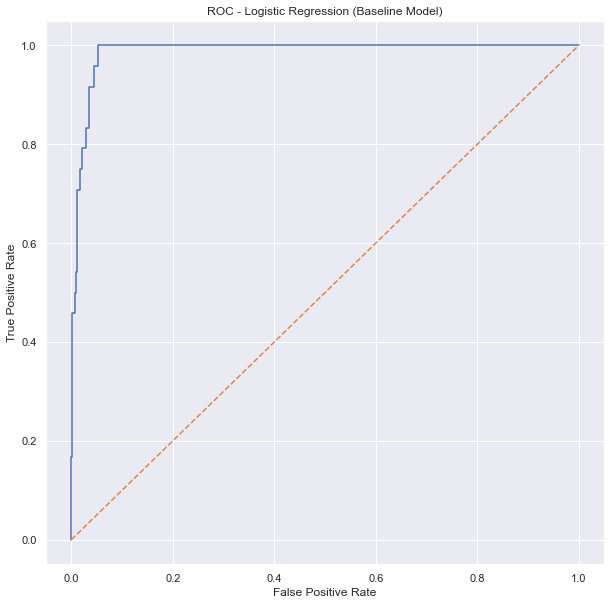

In [87]:
y_prob = clf_LogitReg.predict_proba(X_validate)
y_prob = y_prob[:, 1]

fpr, tpr, thresholds = roc_curve(y_validate, y_prob)
print(f"AUC Score: {auc(fpr, tpr)}") 
plt.subplots(1, figsize=(10,10))
plt.title('ROC - Logistic Regression (Baseline Model)')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# RANDOM FOREST MODEL

In [10]:
#Create Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf_RandomForest=RandomForestClassifier(n_estimators=100)

X2_train = df_train.drop(columns = ['all_star_player','ft_per_g'])
y2_train = df_train['all_star_player']
X2_validate = df_validate.drop(columns = ['all_star_player','ft_per_g'])
y2_validate = df_validate['all_star_player']


#Train the model using the training sets y_pred=clf.predict(X_test)
clf_RandomForest.fit(X2_train,y2_train)
y2_pred=clf_RandomForest.predict(X2_validate)


score2 = clf_RandomForest.score(X2_validate,y2_validate)
print("Random Forest Validation Metrics")
print("Accuracy:"+str(score2))
print(f"Precision:{precision_score(y2_validate, y2_pred)}") 
print(f"Recall:{recall_score(y2_validate, y2_pred)}") 
print(f"F1:{f1_score(y2_validate, y2_pred)}") 


#confusion_matrix(y2_train, y2_pred)

Random Forest Validation Metrics
Accuracy:0.9601518026565465
Precision:0.5652173913043478
Recall:0.5416666666666666
F1:0.5531914893617021


# SMOTE - Imbalance Data

In [12]:
# SMOTE with Scaled Data - Logistic Regression
from imblearn.over_sampling import SMOTE

# Synthesize minority class datapoints using SMOTE
sm = SMOTE(random_state=42, sampling_strategy='minority')
smote_x_train, smote_y_train = sm.fit_resample(X_train_scaled, y_train_scaled)

clf_LogitReg = LogisticRegression(random_state=0).fit(smote_x_train, smote_y_train)

y_pred = clf_LogitReg.predict(X_validate)
score = clf_LogitReg.score(X_validate,y_validate)

print("Logistic Regression with Smote Validation Metrics")
print("Accuracy:"+str(score))
print(f"Precision:{precision_score(y_validate, y_pred)}") 
print(f"Recall:{recall_score(y_validate, y_pred)}") 
print(f"F1:{f1_score(y_validate, y_pred)}") 

Logistic Regression with Smote Validation Metrics
Accuracy:0.9108159392789373
Precision:0.3380281690140845
Recall:1.0
F1:0.5052631578947369


In [13]:
# SMOTE with Random Forest
from sklearn.metrics import confusion_matrix

sm = SMOTE(random_state=42, sampling_strategy='minority')
smote_x_train, smote_y_train = sm.fit_resample(X_train, y_train)

clf_RandomForest2=RandomForestClassifier(n_estimators=100)
clf_RandomForest2.fit(smote_x_train,smote_y_train)

X3_validate = df_validate.drop(columns = ['all_star_player','ft_per_g','g','fg_per_g','fg_pct','fg3_per_g','fg2_per_g','stl_per_g','tov_per_g','mp','efg_pct','pf_per_g','trb_per_g'])
y3_validate = df_validate['all_star_player']

y_pred = clf_RandomForest2.predict(X3_validate)
score = clf_RandomForest2.score(X3_validate,y3_validate)

print("Random Forest with Smote Validation Metrics")
print("Accuracy:"+str(score))
print(f"Precision:{precision_score(y3_validate, y_pred)}") 
print(f"Recall:{recall_score(y3_validate, y_pred)}") 
print(f"F1:{f1_score(y3_validate, y_pred)}") 

confusion_matrix(y3_validate, y_pred)

Random Forest with Smote Validation Metrics
Accuracy:0.9639468690702088
Precision:0.5641025641025641
Recall:0.9166666666666666
F1:0.6984126984126983


array([[486,  17],
       [  2,  22]], dtype=int64)

# GBM

In [14]:
# GBM
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
# fit the model on the whole dataset
gbm = GradientBoostingClassifier()
gbm.fit(smote_x_train, smote_y_train)

X4_validate = df_validate.drop(columns = ['all_star_player','ft_per_g','g','fg_per_g','fg_pct','fg3_per_g','fg2_per_g','stl_per_g','tov_per_g','mp','efg_pct','pf_per_g','trb_per_g'])
y4_validate = df_validate['all_star_player']

y_pred = gbm.predict(X4_validate)
score = gbm.score(X4_validate,y4_validate)

print("GBM Metrics")
print("Accuracy:"+str(score))
print(f"Precision:{precision_score(y4_validate, y_pred)}") 
print(f"Recall:{recall_score(y4_validate, y_pred)}") 
print(f"F1:{f1_score(y4_validate, y_pred)}") 

confusion_matrix(y4_validate, y_pred)

GBM Metrics
Accuracy:0.9449715370018975
Precision:0.45098039215686275
Recall:0.9583333333333334
F1:0.6133333333333333


array([[475,  28],
       [  1,  23]], dtype=int64)

In [15]:
# Remove Outliers - GBM
dfo_train = pd.read_csv("FINAL NBA All Star - train_nooutliers.csv")
XO_train = dfo_train.drop(columns = ['all_star_player','ft_per_g','g','fg_per_g','fg_pct','fg3_per_g','fg2_per_g','stl_per_g','tov_per_g','mp','efg_pct','trb_per_g','pf_per_g'])
XO_train.drop(columns = ['tm_abbrv','tm_year','name','pos','year','name-year','allstar_pos'], inplace=True)
yo_train = dfo_train['all_star_player']

sm = SMOTE(random_state=42, sampling_strategy='minority')
smote_XO_train, smote_yo_train = sm.fit_resample(XO_train, yo_train)

gbmO = GradientBoostingClassifier()
gbmO.fit(smote_XO_train, smote_yo_train)

yo_pred = gbmO.predict(X4_validate)
score = gbmO.score(X4_validate,y4_validate)

print("GBM Metrics with Outliers removed")
print("Accuracy:"+str(score))
print(f"Precision:{precision_score(y4_validate, yo_pred)}") 
print(f"Recall:{recall_score(y4_validate, yo_pred)}") 
print(f"F1:{f1_score(y4_validate, yo_pred)}") 

confusion_matrix(y4_validate, yo_pred)

GBM Metrics with Outliers removed
Accuracy:0.9449715370018975
Precision:0.45098039215686275
Recall:0.9583333333333334
F1:0.6133333333333333


array([[475,  28],
       [  1,  23]], dtype=int64)

In [21]:
# Remove Outliers - Random Forest
from sklearn.metrics import confusion_matrix

clf_RandomForest3=RandomForestClassifier(n_estimators=100)
clf_RandomForest3.fit(smote_XO_train,smote_yo_train)

y_pred = clf_RandomForest3.predict(X4_validate)
score = clf_RandomForest3.score(X4_validate,y4_validate)

print("Random Forest with Smote Validation Metrics")
print("Accuracy:"+str(score))
print(f"Precision:{precision_score(y4_validate, y_pred)}") 
print(f"Recall:{recall_score(y4_validate, y_pred)}") 
print(f"F1:{f1_score(y4_validate, y_pred)}") 

confusion_matrix(y4_validate, y_pred)

Random Forest with Smote Validation Metrics
Accuracy:0.9658444022770398
Precision:0.5789473684210527
Recall:0.9166666666666666
F1:0.7096774193548387


array([[487,  16],
       [  2,  22]], dtype=int64)

# XGB

In [20]:
from xgboost import XGBClassifier

clf_XGB = XGBClassifier()
clf_XGB.fit(smote_XO_train,smote_yo_train)
          
y_pred = clf_XGB.predict(X4_validate)
score = clf_XGB.score(X4_validate,y4_validate)

print("XGBoost with Smote Validation Metrics")
print("Accuracy:"+str(score))
print(f"Precision:{precision_score(y4_validate, y_pred)}") 
print(f"Recall:{recall_score(y4_validate, y_pred)}") 
print(f"F1:{f1_score(y4_validate, y_pred)}") 

confusion_matrix(y4_validate, y_pred)

C:\Users\medch\Anaconda3\envs\metis\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:35:17] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Random Forest with Smote Validation Metrics
Accuracy:0.9601518026565465
Precision:0.5454545454545454
Recall:0.75
F1:0.631578947368421


C:\Users\medch\Anaconda3\envs\metis\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


array([[488,  15],
       [  6,  18]], dtype=int64)

# Join Validation and Training Data

In [42]:
# Join Train and Validation Data
df_final = pd.concat([df_train, df_validate])
X_final = df_final.drop(columns = ['all_star_player','ft_per_g','g','fg_per_g','fg_pct','fg3_per_g','fg2_per_g','stl_per_g','tov_per_g','mp','efg_pct','trb_per_g','pf_per_g'])
#X_final.drop(columns = ['tm_abbrv','tm_year','name','pos','year','name-year','allstar_pos'], inplace=True)
y_final = df_final['all_star_player']

In [43]:

clf_RandomForest3=RandomForestClassifier(n_estimators=100)
clf_RandomForest3.fit(X_final,y_final)


RandomForestClassifier()

In [44]:
clf_XGB = XGBClassifier()
clf_XGB.fit(X_final,y_final)

C:\Users\medch\Anaconda3\envs\metis\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:26:16] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Test Final Model

In [47]:
# Test data 
df_test = pd.read_csv("FINAL NBA All Star - test_mix.csv")
X_test = df_test.drop(columns = ['all_star_player','ft_per_g','g','fg_per_g','fg_pct','fg3_per_g','fg2_per_g','stl_per_g','tov_per_g','mp','efg_pct','trb_per_g','pf_per_g'])
X_test.drop(columns = ['tm_abbrv','tm_year','name','pos','year','name-year','allstar_pos'], inplace=True)
y_test = df_test['all_star_player']



In [48]:
y_pred = clf_XGB.predict(X_test)
score = clf_XGB.score(X_test,y_test)

print("XGB with SMOTE Test Metrics")
print("Accuracy:"+str(score))
print(f"Precision:{precision_score(y_test, y_pred)}") 
print(f"Recall:{recall_score(y_test, y_pred)}") 
print(f"F1:{f1_score(y_test, y_pred)}") 

confusion_matrix(y_test, y_pred)

XGB with SMOTE Test Metrics
Accuracy:0.9721706864564007
Precision:0.64
Recall:0.7272727272727273
F1:0.6808510638297872


C:\Users\medch\Anaconda3\envs\metis\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


array([[508,   9],
       [  6,  16]], dtype=int64)

In [49]:
# Random Forest
y_pred = clf_RandomForest3.predict(X_test)
score = clf_RandomForest3.score(X_test,y_test)

print("Random Forest with SMOTE Test Metrics")
print("Accuracy:"+str(score))
print(f"Precision:{precision_score(y_test, y_pred)}") 
print(f"Recall:{recall_score(y_test, y_pred)}") 
print(f"F1:{f1_score(y_test, y_pred)}") 

confusion_matrix(y_test, y_pred)

Random Forest with SMOTE Test Metrics
Accuracy:0.9851576994434137
Precision:0.8181818181818182
Recall:0.8181818181818182
F1:0.8181818181818182


array([[513,   4],
       [  4,  18]], dtype=int64)

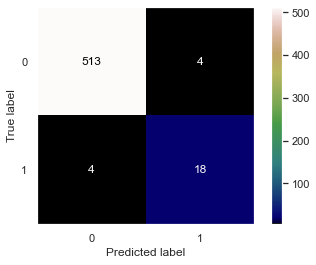

In [72]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf_RandomForest3, X_test, y_test, cmap=plt.cm.gist_earth)
plt.grid(False)
plt.show()

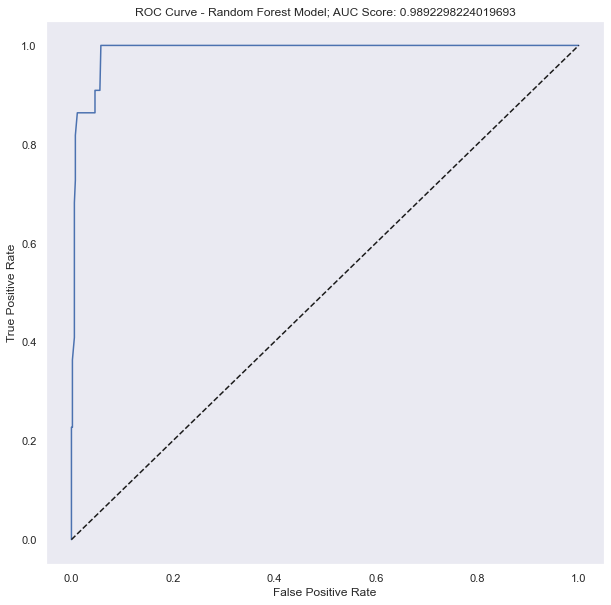

In [74]:
y_proba = clf_RandomForest3.predict_proba(X=X_test)
y_proba = y_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.subplots(1, figsize=(10,10))
plt.title(f"ROC Curve - Random Forest Model; AUC Score: {auc(fpr, tpr)}")
sns.set()
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.grid(False)
#plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [75]:
pd.DataFrame({'Variable':X_test.columns,
              'Importance':clf_RandomForest3.feature_importances_}).sort_values('Importance', ascending=False)


,Variable,Importance
1,pts_per_g,0.421812
4,gs,0.147859
2,ast_per_g,0.141913
5,tm_srs,0.132245
3,blk_per_g,0.093305
0,age,0.062866


In [77]:
# ShahONeal 2007
clf_RandomForest3.predict([[17.3,39,2,-1.21,1.4,34]])

array([0], dtype=int64)

In [78]:
# ShahONeal 2001
clf_RandomForest3.predict([[28.7,74,3.7,3.74,2.8,28]])

array([0], dtype=int64)

In [79]:
# ShahONeal 2000
clf_RandomForest3.predict([[29.7,79,3.8,8.41,3,27]])

array([0], dtype=int64)